In [4]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc/

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [5]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [60]:
# specify path to the lightcurve and spectrum
lc_path = "TDSS_data/CV_P_LC_ZTFr.csv"
spec_path = "TDSS_data/CV_P_spec.csv"

# object name (or abbreviation)
n = "CV_P"

# resample length for time-sorted LC purposes
resample_len = '10min'

In [61]:
#load into pandas dataframes
lc = pd.read_csv(lc_path)
spec = pd.read_csv(spec_path)

time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
phase_preproc_lc = LC_phasesort_preproc(lc, bins=phase_bins())
phasefit_preproc_lc = LC_phasefit_preproc(lc_path, bins=phase_bins())
preproc_spec = spectra_preproc(spec, bins=wavelength_bins())

#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

# Initial Light Curve Exploration

In [62]:
print("The observations span",str(round(lc.mjd.max()-lc.mjd.min(), 2)),"days")

The observations span 4027.09 days


In [67]:
len(lc)

684

In [63]:
len(lc[lc['mjd'].between(55450, 55600)])

37

# Time Sorted Light Curve

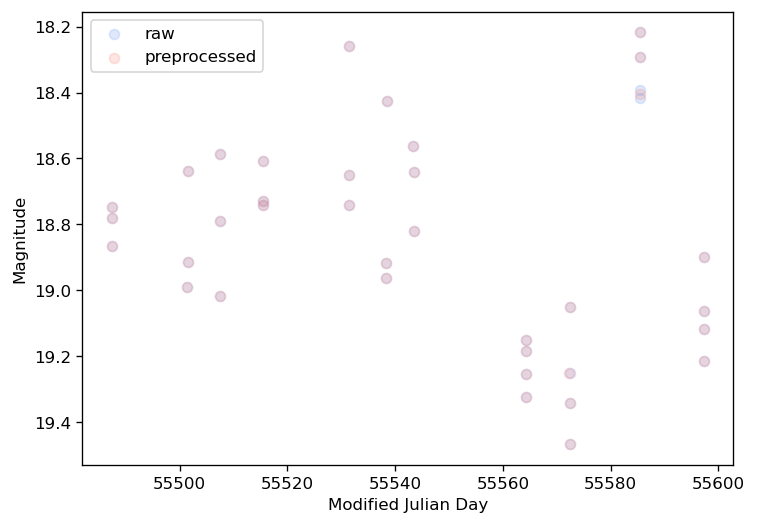

In [64]:
fig1 = plot_timesort(lc, time_preproc_lc, start=55450, end=55600)

In [65]:
len(time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(55450, 55600)])

21601

In [66]:
len(time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(55450, 55600)].dropna())

36

In [34]:
len(lc)

50

Binning to 36 hours doesn't seem to mask any important variability artifacts from the light curve, it only muffles small scale variability   

In [32]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

Estimated video time of 43.411764705882355 s


# Save Preprocessed File

In [35]:
#save preprocessed files
time_preproc_lc.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
phase_preproc_lc.to_csv("preproc/{}/{}_LC_phasesort.csv".format(n,n), index=False)
phasefit_preproc_lc.to_csv("preproc/{}/{}_LC_phasefit.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)